Intro

# www.imdb.com

<img src="review.png"> 

Get archives for labeled training and test data from: http://ai.stanford.edu/~amaas/data/sentiment/'

## Load the data




In [1]:
import io
import pandas as pd
import numpy as np

with io.open('data/aclImdb/train-pos.txt', encoding='utf-8') as f:
    train_pos = pd.DataFrame({'review': list(f)})    
with io.open('data/aclImdb/train-neg.txt', encoding='utf-8') as f:
    train_neg = pd.DataFrame({'review': list(f)}) 
train_reviews = pd.concat([train_neg, train_pos], ignore_index=True)

with io.open('data/aclImdb/test-pos.txt', encoding='utf-8') as f:
    test_pos = pd.DataFrame({'review': list(f)})
with io.open('data/aclImdb/test-neg.txt', encoding='utf-8') as f:
    test_neg = pd.DataFrame({'review': list(f)})    
test_reviews = pd.concat([test_neg, test_pos], ignore_index=True)
  
X_train = train_reviews['review']
X_test = test_reviews['review']

y_train = np.append(np.zeros(12500), np.ones(12500))
y_test = np.append(np.zeros(12500), np.ones(12500)) 

## First review - good or bad?




In [2]:
X_train[0]

u"a reasonable effort is summary for this film .  a good sixties film but lacking any sense of achievement .  maggie smith gave a decent performance which was believable enough but not as good as she could have given ,  other actors were just dreadful !  a terrible portrayal .  it wasn't very funny and so it didn't really achieve its genres as it wasn't particularly funny and it wasn't dramatic .  the only genre achieved to a satisfactory level was romance .  target audiences were not hit and the movie sent out confusing messages .  a very basic plot and a very basic storyline were not pulled off or performed at all well and people were left confused as to why the film wasn't as good and who the target audiences were etc .  however maggie was quite good and the storyline was alright with moments of capability .   4 . \n"

## What people thought




In [3]:
y_train[100]

0.0

# A naive approach: word counts  

Basic principle: count and weight positive words, count and weight negative words, highest score wins

Two types of challenge if we want to do this in an automated way:
- how do I obtain the weights (how do I even know if something's positive or negative?)
- how do I deal with complexity introduced by this being <i>language</i>?


# Challenge no. 1: handling language (syntax / semantics)

Some examples rom our review above:
> performance which was believable enough but not as good as she could have given

> lacking any sense of achievement 

> it wasn't very funny

> the only genre achieved to a satisfactory level was romance

# So what's best: unigrams, bigrams, trigrams...?

Instead of hypothesizing let's check what works best on our data set.

First, let's inspect the most frequent unigrams, bigrams and trigrams and their actual frequencies.

But there's another question to be answered before...



## How to handle stopwords?

In [4]:
from nltk.corpus import stopwords
stopwords_nltk = set(stopwords.words("english"))
print(stopwords_nltk)

set([u'all', u'just', u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'o', u'hadn', u'herself', u'll', u'had', u'should', u'to', u'only', u'won', u'under', u'ours', u'has', u'do', u'them', u'his', u'very', u'they', u'not', u'during', u'now', u'him', u'nor', u'd', u'did', u'didn', u'this', u'she', u'each', u'further', u'where', u'few', u'because', u'doing', u'some', u'hasn', u'are', u'our', u'ourselves', u'out', u'what', u'for', u'while', u're', u'does', u'above', u'between', u'mustn', u't', u'be', u'we', u'who', u'were', u'here', u'shouldn', u'hers', u'by', u'on', u'about', u'couldn', u'of', u'against', u's', u'isn', u'or', u'own', u'into', u'yourself', u'down', u'mightn', u'wasn', u'your', u'from', u'her', u'their', u'aren', u'there', u'been', u'whom', u'too', u'wouldn', u'themselves', u'weren', u'was', u'until', u'more', u'himself', u'that', u'but', u'don', u'with', u'than', u'those', u'he', u'me', u'myself', u'ma', u'these', u'up', u'will', u'below', u'ain

In [5]:
# don't want to exclude the negations
relevant_words = set(['not', 'nor', 'no', 'wasn', 'ain', 'aren', 'very', 'only', 'but', 'don', 'isn', 'weren'])
stopwords_filtered = list(stopwords_nltk.difference(relevant_words))

## Most frequent unigrams

In [6]:
# if we had the time to do this live ...
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(stop_words = stopwords_filtered, max_features = 5000, ngram_range = (1,1)) ...
word_counts_unigram = pd.read_csv('word_counts_sorted_ngram_1_stopwords_removed.csv', 
                                  usecols=['word', 'count'])
print('overall word count: {}'.format(word_counts_unigram['count'].sum()))
word_counts_unigram.head(10)

overall word count: 2827541


,count,word
0,44047,movie
1,42623,but
2,40159,film
3,30632,not
4,26795,one
5,20281,like
6,15147,good
7,14067,very
8,12727,time
9,12716,no


## Most frequent bigrams

In [7]:
word_counts_unigram = pd.read_csv('word_counts_sorted_ngram_2_stopwords_removed.csv', 
                                  usecols=['word', 'count'])
print('overall bigram count: {}'.format(word_counts_unigram['count'].sum()))
word_counts_unigram.head(10)

overall bigram count: 324066


,count,word
0,1925,but not
1,1321,ever seen
2,1284,not only
3,1200,very good
4,1113,special effects
5,1043,even though
6,1032,movie but
7,1024,don know
8,1007,movie not
9,888,one best


## Most frequent trigrams

In [8]:
word_counts_unigram = pd.read_csv('word_counts_sorted_ngram_3_stopwords_removed.csv', 
                                  usecols=['word', 'count'])
print('overall trigram count: {}'.format(word_counts_unigram['count'].sum()))
word_counts_unigram.head(10)

overall trigram count: 6176


,count,word
0,262,movie ever seen
1,243,worst movie ever
2,205,don waste time
3,177,movies ever seen
4,164,new york city
5,162,don get wrong
6,160,one worst movies
7,141,worst movies ever
8,120,film ever seen
9,114,movie ever made


## Most frequent four-grams

In [9]:
word_counts_unigram = pd.read_csv('word_counts_sorted_ngram_4_stopwords_removed.csv', 
                                  usecols=['word', 'count'])
print('overall bigram count: {}'.format(word_counts_unigram['count'].sum()))
word_counts_unigram.head(10)

overall bigram count: 456


,count,word
0,132,worst movie ever seen
1,121,one worst movies ever
2,86,worst movies ever seen
3,61,worst film ever seen
4,56,one worst films ever


# Challenge no. 2: Determine word sentiment and weight

This is a classical classification task.
Can use one of the usual suspects:
- Logistic regression
- Decision trees
- Support Vector Machines
- ...

TBD : Logsitic Regression explained

# The right combination

- Which classifier works best?
- With what input (unigrams, bigrams, trigrams ...)?
- Using which parameter settings?

==> Perform a grid search

In [10]:
# logistic regression with 1-grams, 1-2-grams, 1-3-grams and different complexity penalty values

# vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,
#                             stop_words = None, max_features = 10000)

#logistic_model = LogisticRegression() 
#logistic_pipeline = Pipeline([("vectorizer", vectorizer), ("logistic", logistic_model)])
#search_params = dict(vectorizer__ngram_range = [(1,1), (1,2), (1,3)],
#                     vectorizer__stop_words = [stopwords_filtered, None],
#                     logistic__C = [0.01, 0.03, 0.05, 0.1])

#best_logistic = GridSearchCV(logistic_pipeline, param_grid=search_params, cv=5, verbose=1)
#best_logistic.fit(X_train, y_train)
#print(best_logistic.best_params_)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def assess_classification_performance(model, X_train, y_train, X_test, y_test):
  
    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    accuracy_test = accuracy_score(y_test, model.predict(X_test))
    print('\nClassification performance overview:\n************************************')
    print('accuracy (train/test): {} / {}\n'.format(accuracy_train, accuracy_test))
    # confusion matrix
    # rows: actual group
    # columns: predicted group
    print('Confusion_matrix (training data):')
    print(confusion_matrix(y_train, model.predict(X_train)))
    print('Confusion_matrix (test data):')
    print(confusion_matrix(y_test, model.predict(X_test)))


# Logistic Regression best fit

- unigrams and bigrams
- C = 0.03

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,
                             stop_words = stopwords_filtered, max_features = 10000, ngram_range = (1,2))
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

logistic_model = LogisticRegression(C=0.03) 
logistic_model.fit(X_train_features, y_train)

LogisticRegression(C=0.03, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Logistic Regression - how well did it work?

In [13]:
assess_classification_performance(logistic_model, X_train_features, y_train, X_test_features, y_test)


Classification performance overview:
************************************
accuracy (train/test): 0.94276 / 0.88716

Confusion_matrix (training data):
[[11704   796]
 [  635 11865]]
Confusion_matrix (test data):
[[11059  1441]
 [ 1380 11120]]


## Which words make it positive?

In [14]:
vocabulary = vectorizer.get_feature_names()
coefs = logistic_model.coef_
word_importances = pd.DataFrame({'word': vocabulary, 'coef': coefs.tolist()[0]})
word_importances_sorted = word_importances.sort_values(by='coef', ascending = False)
word_importances_sorted[:10]

,coef,word
2969,0.672635,excellent
6681,0.563958,perfect
9816,0.521026,wonderful
8646,0.520818,superb
3165,0.505146,favorite
431,0.502118,amazing
5923,0.481505,must see
5214,0.461807,loved
3632,0.458645,funniest
2798,0.453481,enjoyable


## Which words make it negative?

In [15]:
word_importances_sorted[-11:-1]

,coef,word
6864,-0.564446,poor
2625,-0.565503,dull
9855,-0.575060,worse
4267,-0.588133,horrible
2439,-0.596302,disappointing
6866,-0.675187,poorly
1045,-0.681608,boring
2440,-0.688024,disappointment
702,-0.811184,awful
9607,-0.838195,waste


## How about the bigrams? (1)

In [16]:
word_importances_bigrams = word_importances_sorted[word_importances_sorted.word.apply(lambda c: len(c.split()) >= 2)]
word_importances_bigrams[:10]

,coef,word
5923,0.481505,must see
3,0.450675,10 10
6350,0.421314,one best
9701,0.389081,well worth
5452,0.371277,may not
6139,0.329485,not bad
6970,0.323805,pretty good
2259,0.307238,definitely worth
5208,0.303380,love movie
9432,0.301404,very good


## How about the bigrams? (2)

In [17]:
word_importances_bigrams[-11:-1]

,coef,word
6431,-0.247169,only good
3151,-0.250090,fast forward
9861,-0.264564,worst movie
6201,-0.324169,not recommend
6153,-0.332796,not even
6164,-0.333147,not funny
6217,-0.357056,not very
6169,-0.368976,not good
6421,-0.437750,one worst
9609,-0.451138,waste time


## So that's Logistic Regression with bigrams, - how about other classifiers?

### best accuracies per classifier
<table border="1">
<tr>
<th></th><th>1-grams</th><th>1-2-grams, with stopword filtering</th><th>1-3-grams, without stopword filtering</th>
</tr>
<tr>
<th>Logistic Regression</th><td></td><td>0.89</td><td></td>
</tr>
<tr>
<th>Support Vector Machine</th><td></td><td></td><td>0.84</td>
</tr>
<tr>
<th>Random Forest</th><td>tbd</td><td></td>
</tr>
</table>

# Beyond word counts: Word embeddings

## If we had time to train the model, we'd actually execute this...

In [18]:
# can use train_reviews and test_reviews from above
#import nltk.data
#tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

#sentences_train = []  
#for review in train_reviews["review"]:
#    sentences_train += [s.split() for s in tokenizer.tokenize(review)]
#sentences_test = []  
#for review in test_reviews["review"]:
#    sentences_test += [s.split() for s in tokenizer.tokenize(review)]
#all_sentences = sentences_train + sentences_test

# model parameters
#num_features = 100    # Word vector dimensionality                      
#min_word_count = 20   # Minimum word count                        
#num_workers = 2       # Number of threads to run in parallel
#context = 10          # Context window size                                                                                    
#downsampling = 1e-3   # Downsample setting for frequent words

#model = word2vec.Word2Vec(all_sentences, workers=num_workers, size=num_features, min_count = min_word_count,
#                          window = context, sample = downsampling)
#model.init_sims(replace=True)
#model_name = "models/word2vec_100features"
#model.save(model_name)

Let's instead load the model from disk and inspect it:

In [19]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('models/word2vec_100features')
print(model.syn0.shape)
print(model['movie'])


(20166, 100)
[-0.02515472  0.16707493 -0.05629794 -0.12409752 -0.01091802 -0.13798206
  0.09231102 -0.09140468 -0.05452388 -0.03555677 -0.08269091 -0.00567267
 -0.09523809 -0.06195637  0.05440474  0.06227686  0.12369317 -0.01537143
 -0.0089783  -0.00528997 -0.04277094  0.07739993 -0.01932896  0.081738
 -0.22357117 -0.14976217  0.05551976  0.13742755 -0.15443996 -0.05471482
 -0.0009601   0.08932991 -0.05292547  0.16765165 -0.05905993 -0.05231098
 -0.08250861 -0.0341751   0.14372236  0.03478728 -0.01529499 -0.0296018
  0.01079863 -0.06377127  0.04163288 -0.07192093  0.25450262 -0.07382536
 -0.07778623  0.07499653 -0.12951691  0.01970425  0.13499822  0.01038768
  0.06625408  0.11575779  0.10367264  0.03894637 -0.07102726  0.00343542
  0.24314043  0.15759529 -0.09808595  0.04601007 -0.01187227 -0.16023833
 -0.17658544 -0.12622575 -0.04592994  0.08045016 -0.11856512  0.04920706
  0.20129348  0.08923753 -0.06545419 -0.05853761 -0.08146987 -0.06782326
  0.17082241  0.02575272  0.058911    0.1

## Which words are similar to <i>awesome</i>?

In [20]:
model.most_similar('awesome', topn=10)

[(u'amazing', 0.7929322123527527),
 (u'incredible', 0.7127916812896729),
 (u'awful', 0.7072071433067322),
 (u'excellent', 0.6961393356323242),
 (u'fantastic', 0.6925109624862671),
 (u'alright', 0.6886886358261108),
 (u'cool', 0.679090142250061),
 (u'outstanding', 0.6213874816894531),
 (u'astounding', 0.613292932510376),
 (u'terrific', 0.6013768911361694)]

## ... and to <i> awful</i>?

In [21]:
model.most_similar('awful', topn=10)

[(u'terrible', 0.8212785124778748),
 (u'horrible', 0.7955455183982849),
 (u'atrocious', 0.7824822664260864),
 (u'dreadful', 0.7722172737121582),
 (u'appalling', 0.7244443893432617),
 (u'horrendous', 0.7235419154167175),
 (u'abysmal', 0.720653235912323),
 (u'amazing', 0.708114743232727),
 (u'awesome', 0.7072070837020874),
 (u'bad', 0.6963905096054077)]

## Can we "subtract out" <i>awful</i>?

In [22]:
model.most_similar(positive=['awesome'], negative=['awful'])

[(u'jolly', 0.3947059214115143),
 (u'midget', 0.38988131284713745),
 (u'knight', 0.3789686858654022),
 (u'spooky', 0.36937469244003296),
 (u'nice', 0.3680706322193146),
 (u'looney', 0.3676275610923767),
 (u'ho', 0.3594890832901001),
 (u'gotham', 0.35877227783203125),
 (u'lookalike', 0.3579031229019165),
 (u'devilish', 0.35554438829421997)]

## Let's try this again with <i>good</i> - <i>bad</i>: <i>Good</i> ...

In [23]:
model.most_similar('good', topn=10)

[(u'bad', 0.769078254699707),
 (u'decent', 0.7574324607849121),
 (u'great', 0.7527369260787964),
 (u'nice', 0.6981208324432373),
 (u'cool', 0.653165340423584),
 (u'fine', 0.6289849877357483),
 (u'terrific', 0.6136247515678406),
 (u'terrible', 0.6056008338928223),
 (u'fantastic', 0.596002995967865),
 (u'solid', 0.5957943201065063)]

## ... and <i>bad</i>:

In [24]:
model.most_similar('bad', topn=10)

[(u'good', 0.769078254699707),
 (u'terrible', 0.7315745949745178),
 (u'horrible', 0.7259382009506226),
 (u'awful', 0.6963905096054077),
 (u'lame', 0.6728411912918091),
 (u'stupid', 0.6556650996208191),
 (u'dumb', 0.628576934337616),
 (u'lousy', 0.6129568815231323),
 (u'cheesy', 0.6102402210235596),
 (u'poor', 0.5851123929023743)]

## So <i>good</i> minus <i>bad</i> is ...

In [25]:
model.most_similar(positive=['good'], negative=['bad'])

[(u'nice', 0.4700997471809387),
 (u'fine', 0.46652451157569885),
 (u'solid', 0.43668174743652344),
 (u'wonderful', 0.4121875464916229),
 (u'pleasant', 0.4049694538116455),
 (u'decent', 0.3975681960582733),
 (u'commendable', 0.39051422476768494),
 (u'splendid', 0.38586685061454773),
 (u'promising', 0.38155609369277954),
 (u'delightful', 0.38095542788505554)]

## Which word doesn't match?

In [26]:
model.doesnt_match("good bad awful terrible".split())

'good'

In [27]:
model.doesnt_match("awesome bad awful terrible".split())

'awesome'

In [28]:
model.doesnt_match("nice pleasant fine excellent".split())

'excellent'

## Visualize in 2d

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 20166
[t-SNE] Computed conditional probabilities for sample 2000 / 20166
[t-SNE] Computed conditional probabilities for sample 3000 / 20166
[t-SNE] Computed conditional probabilities for sample 4000 / 20166
[t-SNE] Computed conditional probabilities for sample 5000 / 20166
[t-SNE] Computed conditional probabilities for sample 6000 / 20166
[t-SNE] Computed conditional probabilities for sample 7000 / 20166
[t-SNE] Computed conditional probabilities for sample 8000 / 20166
[t-SNE] Computed conditional probabilities for sample 9000 / 20166
[t-SNE] Computed conditional probabilities for sample 10000 / 20166
[t-SNE] Computed conditional probabilities for sample 11000 / 20166
[t-SNE] Computed conditional probabilities for sample 12000 / 20166
[t-SNE] Computed conditional probabilities for sample 13000 / 20166
[t-SNE] Computed conditional probabilities 

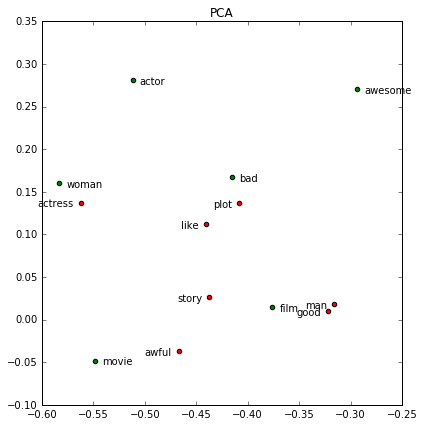

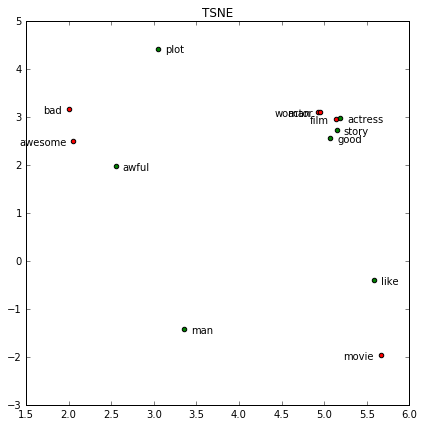

In [32]:
from sklearn.manifold import TSNE
words = ['story', 'movie','plot', 'film', 'good', 'bad', 'awful', 'awesome', 'man', 'woman', 'like', 'actor', 'actress']
vectors = model.syn0

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(vectors)

tsne = TSNE(n_components=2, random_state=0, verbose=10, init='pca')
tsne_2d = tsne.fit_transform(vectors)

first = True
for name, transform in zip(['PCA', 'TSNE'], [pca_2d, tsne_2d]):  
#for name, transform in zip(['PCA'], [pca_2d]):   
    plt.figure(figsize=(6,6))
    for point, word in zip(transform , words):
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "medium"
            )
        first = not first 
    plt.title(name)
    plt.tight_layout()
plt.show()
